In [1]:
import GLPE
#https://github.com/ekehoe32/orthrus
import sys
sys.path.append('/home/katrina/a/mankovic/ZOETIS/Fall2021/Orthrus/orthrus')
import orthrus
from orthrus import core
from orthrus.core import dataset
import numpy as np
# from NetworkDataAnalysis import graph_tools_construction as gt
from matplotlib import pyplot as plt
import pandas
# from orthrus.core.pipeline import *
from sklearn.preprocessing import FunctionTransformer
from orthrus.preprocessing.imputation import HalfMinimum
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from orthrus.core.helper import load_object
import os
import seaborn as sns

In [2]:
#load the dataset
ds = pandas.read_csv('/data4/mankovic/GSE73072/calcom_splits/data/gse73072_5to1_25_32_limma_train.csv', index_col = 'SampleID')

In [3]:
#maybe do some dataset normalization here?

Text(0.5, 1.0, 'Gene Expression Matrix')

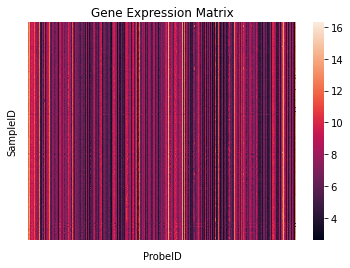

In [4]:
g = sns.heatmap(ds)
plt.xlabel('ProbeID')
g.tick_params(left=False, bottom=False)
g.set(xticklabels=[])
g.set(yticklabels=[])
plt.title('Gene Expression Matrix')

# Simple LPE with GSE data

In [5]:
#init lpe
lpe = GLPE.LPE( feature_ids = list(ds.columns), #list of the probeids or entrez ids for the dataset 
                pathway_files = '/data4/mankovic/GSE73072/new_pw_edge_mtx/', #probeid networks
                normalize_rows=True ) # normalize rows of pathway expression matrix)

#fit to make pathway transition matrix
lpe.fit(X = np.array(ds))

#transform data
pathway_expression_matrix = lpe.transform(np.array(ds))



/home/katrina/a/mankovic/PathwayAnalysis/GLPE.py:191: RuntimeWarning: invalid value encountered in true_divide
  row = row/np.sum(row)


In [6]:
#combine the results into a pathway expression matrix dataframe
pathway_expression_df = pandas.DataFrame(data = pathway_expression_matrix, columns = lpe.pathway_names_, index = ds.index)
pathway_expression_df

,R-HSA-109582,R-HSA-1430728,R-HSA-1266738,R-HSA-109581,R-HSA-212436,R-HSA-168249,R-HSA-162582,R-HSA-397014,R-HSA-1500931,R-HSA-166016,...,R-HSA-1368071,R-HSA-170145,R-HSA-168270,R-HSA-168288,R-HSA-168298,R-HSA-168302,R-HSA-168303,R-HSA-168336,R-HSA-168874,R-HSA-192869
SampleID,,,,,,,,,,,,,,,,,,,,,
GSM1881744,7.555032,7.508696,7.454280,8.168684,7.249438,8.473554,7.100261,6.460005,7.044749,8.194195,...,8.493806,4.552984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1881745,7.558103,7.527427,7.481479,8.191609,7.281804,8.463511,7.115830,6.454360,7.086558,8.172271,...,8.582773,4.675716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1881749,7.561875,7.519266,7.451775,8.211136,7.281491,8.482233,7.105678,6.432204,7.047700,8.215761,...,8.670156,4.649953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1881764,7.545506,7.501286,7.445481,8.231406,7.264536,8.566684,7.123671,6.434900,7.094688,8.273793,...,8.633616,4.833279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1881765,7.536281,7.508743,7.428549,8.261101,7.271526,8.580936,7.100765,6.397225,7.029696,8.288920,...,8.514880,5.100471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1884181,7.561046,7.469872,7.423996,8.109689,7.256253,8.458397,7.122629,6.388764,7.144233,8.174429,...,8.794682,4.479391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1884182,7.551168,7.461632,7.426054,8.045137,7.236001,8.414756,7.116041,6.419725,7.156535,8.138180,...,8.666497,4.432585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1884195,7.603101,7.460094,7.428315,8.028234,7.239460,8.414418,7.113060,6.463737,7.158515,8.134022,...,8.720217,4.804831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Pathway Expression Matrix')

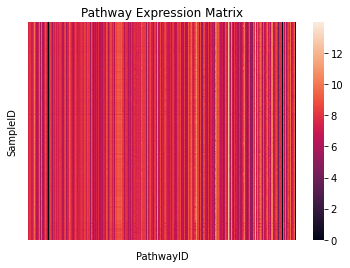

In [7]:
g = sns.heatmap(pathway_expression_df)
plt.xlabel('PathwayID')
g.tick_params(left=False, bottom=False)
g.set(xticklabels=[])
g.set(yticklabels=[])
plt.title('Pathway Expression Matrix')


# GSE Test

In [8]:
#generate clpe
precomputed_clpe = GLPE.CLPE(centrality_measure = 'page_rank', #choose 'page_rank' or 'degree'
                    network_type = 'precomputed', #choose 'precomputed', 'correlation' or 'heatkernel'
                    feature_ids = list(ds.columns), #list of the probeids or entrez ids for the dataset 
                    pathway_files = '/data4/mankovic/GSE73072/new_pw_edge_mtx/', #probeid networks
                    # pathway_files = '/data3/darpa/omics_databases/ensembl2pathway/pathways_edges/pathways/pw_edge_mtx/', #entrezid netowrks
                    directed = True, # directed or undirected network (useful for precomputed)
                    heat_kernel_param=2, # parameter for heatkernel edges
                    normalize_rows=True ) # normalize rows of pathway expression matrix

#fit clpe to generate pathway expression matrix
precomputed_clpe.fit(np.array(ds))

/home/katrina/a/mankovic/PathwayAnalysis/GLPE.py:450: RuntimeWarning: invalid value encountered in true_divide
  scores = scores/np.sum(scores)


CLPE(centrality_measure='page_rank', directed=True,
     feature_ids=['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at',
                  '1294_at', '1316_at', '1320_at', '1405_i_at', '1431_at',
                  '1438_at', '1487_at', '1494_f_at', '1598_g_at', '160020_at',
                  '1729_at', '177_at', '1773_at', '179_at', '1861_at',
                  '200000_s_at', '200001_at', '200002_at', '200003_s_at',
                  '200004_at', '200005_at', '200006_at', '200007_at',
                  '200008_s_at', '200009_at', ...],
     heat_kernel_param=2.0, network_type='precomputed',
     pathway_files='/data4/mankovic/GSE73072/new_pw_edge_mtx/',
     pathway_transition_matrix=<2261x22277 sparse matrix of type '<class 'numpy.float64'>'
	with 169541 stored elements in Compressed Sparse Row format>)

In [9]:
#transform data to make pathway expression matrix
clpe_pathway_expression_matrix = precomputed_clpe.transform(np.array(ds))

In [10]:
#combine the results into a pathway expression matrix dataframe
clpe_pathway_expression_df = pandas.DataFrame(data = clpe_pathway_expression_matrix, columns = precomputed_clpe.pathway_names_, index = ds.index)
clpe_pathway_expression_df

,R-HSA-109582,R-HSA-1430728,R-HSA-1266738,R-HSA-109581,R-HSA-212436,R-HSA-168249,R-HSA-162582,R-HSA-397014,R-HSA-1500931,R-HSA-166016,...,R-HSA-1368071,R-HSA-170145,R-HSA-168270,R-HSA-168288,R-HSA-168298,R-HSA-168302,R-HSA-168303,R-HSA-168336,R-HSA-168874,R-HSA-192869
SampleID,,,,,,,,,,,,,,,,,,,,,
GSM1881744,7.608572,8.236090,7.738098,8.464929,7.594806,8.753164,7.520282,6.562123,7.070321,8.134248,...,8.690967,4.553172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1881745,7.609261,8.267914,7.758823,8.476182,7.610442,8.744467,7.525242,6.540023,7.099921,8.138565,...,8.828361,4.675898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1881749,7.627116,8.260156,7.744214,8.519065,7.623228,8.778902,7.536582,6.524891,7.081879,8.208165,...,8.816460,4.650276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1881764,7.617331,8.191502,7.717130,8.515511,7.601055,8.810682,7.544964,6.517639,7.126968,8.207481,...,8.746216,4.833586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1881765,7.606171,8.226440,7.706562,8.564436,7.613817,8.827143,7.532663,6.464081,7.062350,8.239981,...,8.629149,5.100973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1884181,7.627056,8.125780,7.697908,8.356810,7.590140,8.730226,7.523167,6.451405,7.166203,8.143563,...,8.924522,4.479685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1884182,7.609625,8.072384,7.681681,8.300472,7.561538,8.678468,7.505367,6.485788,7.177636,8.049685,...,8.893230,4.432882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSM1884195,7.673804,8.092078,7.701595,8.285671,7.598568,8.665355,7.520716,6.553129,7.174820,8.048699,...,8.867951,4.805395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Centrality Pathway Expression Matrix')

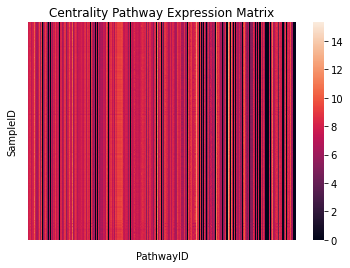

In [11]:
g = sns.heatmap(clpe_pathway_expression_df)
plt.xlabel('PathwayID')
g.tick_params(left=False, bottom=False)
g.set(xticklabels=[])
g.set(yticklabels=[])
plt.title('Centrality Pathway Expression Matrix')
